In [1]:
import time
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

HERE = os.getcwd()
os.chdir("C:\\Users\\group\\Code\\sensors\\TCS34725\\DFRobot_sen0212")

from dfrobot_sen0212 import GS0212

os.chdir(HERE)

In [2]:
rgb = GS0212("COM4")

In [3]:
rgb.read_hsv()

[0.5221445221445221, 0.36111111111111116, 0.3656509695290859]

In [4]:
rgb.correct_to_white()

True

In [7]:
rgb.read_hsv()

[0.5602284092552171, 0.03202341610801637, 0.3808068459657702]

In [8]:
start = time.time()

timestamps = []
rgb_vals = []
hsv_vals = []
raw_vals = []

for i in range(3600):
    
    time.sleep(1)
    timestamps.append(time.time() - start)
    raw_vals.append(rgb.read_values())
    rgb_vals.append(rgb.read_rgb())
    hsv_vals.append(rgb.read_hsv())


In [9]:
rgb_vals = np.array(rgb_vals)
raw_vals = np.array(raw_vals)
hsv_vals = np.array(hsv_vals)

In [10]:
df = pd.DataFrame([timestamps, raw_vals, rgb_vals, hsv_vals]).T

In [11]:
raw = pd.DataFrame(data=raw_vals, index=timestamps, columns=["RedCh", "GreenCh", "BlueCh", "ClearCh"])
rgb = pd.DataFrame(data=rgb_vals, index=timestamps, columns=["Red", "Green", "Blue"])
hsv = pd.DataFrame(data=hsv_vals, index=timestamps, columns=["Hue", "Saturation", "Value"])
all = pd.concat([raw, rgb, hsv], axis=1)

In [12]:
all.to_csv("iodine_discolouration_200924")

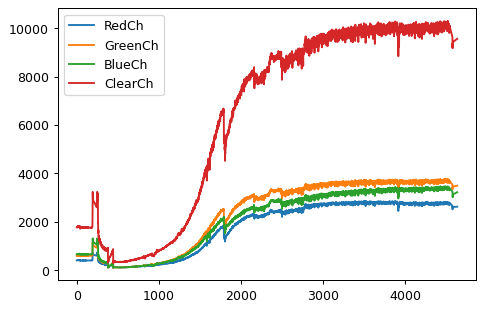

In [13]:
plt.figure(dpi=90)
plt.plot(raw)
plt.legend(raw.columns)

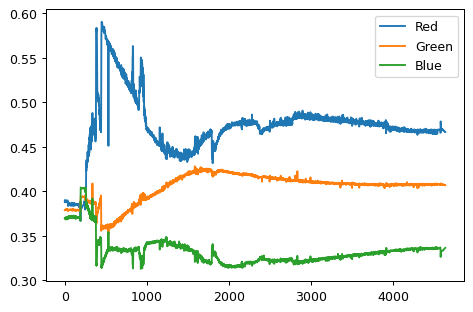

In [15]:
plt.figure(dpi=90)
plt.plot(rgb)
plt.legend(rgb.columns)

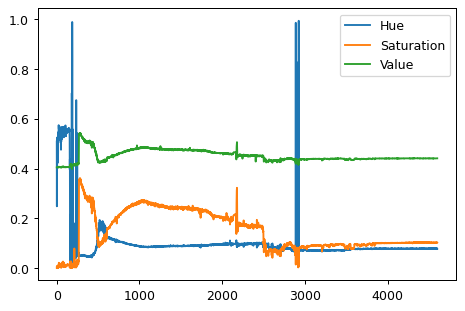

In [14]:
plt.figure(dpi=90)
plt.plot(hsv)
plt.legend(hsv.columns)

In [15]:
end = time.time()

In [22]:
all = pd.read_csv("iodine_discolouration_200924")

In [23]:
time = all.iloc[:,0]

In [24]:
raw = all[["RedCh", "GreenCh", "BlueCh", "ClearCh"]]
rgb = all[["Red", "Green", "Blue"]]
hsv = all[["Hue", "Saturation", "Value"]]

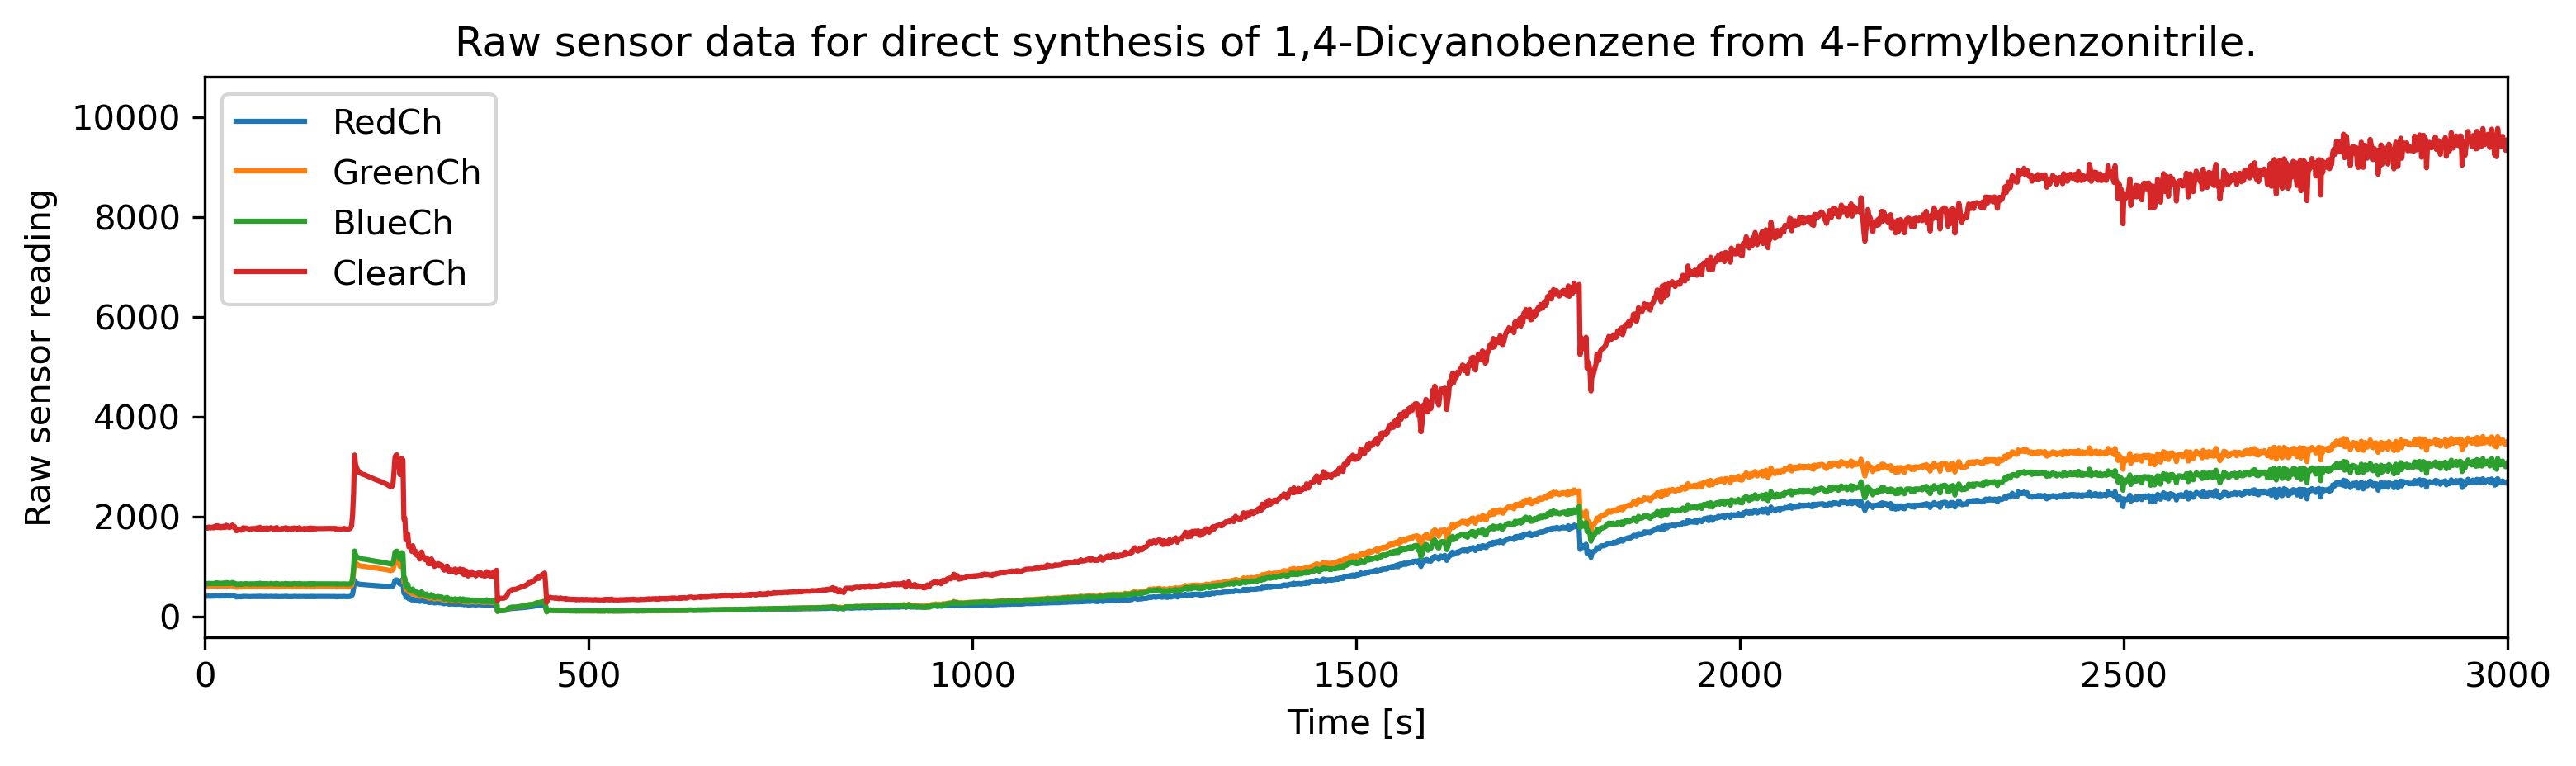

In [26]:
plt.figure(dpi=300, figsize=(12,3))

plt.plot(time, raw)
plt.legend(raw.columns)
plt.xlim(0, 3000)
plt.ylabel("Raw sensor reading")
plt.xlabel("Time [s]")
plt.title("Raw sensor data for direct synthesis of 1,4-Dicyanobenzene from 4-Formylbenzonitrile.")
plt.savefig("iodine_discolouration_v2.png")

In [ ]:
plt.figure(dpi=300, figsize=(12,3))
plt.ylabel("RGB values")
plt.xlabel("Time [s]")
plt.xlim(0, 3000)
plt.plot(time, rgb["Red"], "r", time, rgb["Green"], "g", time, rgb["Blue"], "b")
plt.legend(rgb.columns)
plt.title("RGB plot")
plt.savefig("rgb.png")

In [ ]:
plt.figure(dpi=300)
plt.ylabel("HSV values")
plt.xlabel("Time [s]")
plt.plot(time, hsv)
plt.legend(hsv.columns)
plt.xlim(0, 3000)
plt.title("HSV plot")
plt.savefig("hsv.png")